In [435]:
# %%bash
# ls
# git add .
# git commit -m 'tmp notebook update'
# git push

LICENSE
README.md
mfa.py
pymfa_tmp.ipynb
[master 5f4c89a] tmp notebook update
 1 file changed, 10 insertions(+), 25 deletions(-)


To github.com:lukaszmachura/pymfa.git
   7247684..5f4c89a  master -> master


In [362]:
# artificial data
import random
N = 2 ** 14
x = [random.gauss(0, 2) for i in range(N)]

# plt.plot(x)

In [428]:
import matplotlib.pyplot as plt
import numpy as np


class DFA:
    """
    Attributes
    data: numpy array - data
    X: numpy array - normalized data
    scales: list - list of scales
    fluctuating_function: list - average fluctuating function for a scale
    
    _scales_base: list - base for calculating scales
    """
    
    def __init__(self, data):
        self.data = data
        self.m = 1
        
    @property
    def data(self):
        return self.__data
    
    @data.setter
    def data(self, var):
        self.__data = np.asarray(var)
        
    def normalize(self):
        mean = np.mean(self.data)
        std = np.std(self.data)
        return (self.data - mean) / std
        
    def cumsum(self):
        x = self.data - np.mean(self.data)
        self.X = np.cumsum(x)
        return self.X

    def set_scales(self, scales='auto', scales_no=None, base=2):
        if isinstance(scales, (tuple, list, np.ndarray)):
            "OK"
        else:
            # print('automatic scales')
            length = self.data.size
            if base == 2:
                minimal = 4
                maximal = int(np.log2(length // 10))
            elif base == 10:
                minimal = 1
                maximal = int(np.log10(length // 10))
            else:
                raise ValueError('base can be 2 or 10')
            
            if not scales_no:
                scales_no = maximal - minimal + 1
                
            scales = sorted(set([int(base ** p) for p in np.linspace(minimal, maximal, scales_no)]))
        
        if 'fluctuating_function' in self.__dict__:
            del self.__dict__['fluctuating_function']
        self._scales_base = base
        self.scales = scales
        return self.scales

    def F(self):
        if 'X' not in self.__dict__:
            self.cumsum()
        
        if 'scales' not in self.__dict__:
            self.set_scales()
        
        self.fluctuating_function = []
        for s in self.scales:
            segments = int(len(self.X)/s)
            
            RMS_dla_skali = []
            for v in range(segments):
                idx_start = v * s
                idx_stop  = idx_start + s

                C = np.polyfit(range(idx_start, idx_stop), self.X[idx_start:idx_stop], self.m)
                fit = np.poly1d(C)
                _b = np.sqrt(np.mean((self.X[idx_start:idx_stop] - fit(range(idx_start,idx_stop))) ** 2))
                RMS_dla_skali.append(_b)
            
            _ff = np.sqrt(np.mean(RMS_dla_skali) ** 2)
            self.fluctuating_function.append(_ff)
            
        return self.fluctuating_function
    
    def hurst(self):
        if 'scales' not in self.__dict__:
            self.set_scales()

        if 'fluctuating_function' not in self.__dict__:
            self.F()
            
        slope, y_intercept = np.polyfit(np.log2(self.scales), np.log2(self.fluctuating_function), 1)
        
        self.hurst_exponent = slope
        return self.hurst_exponent
    
    def plot_Fs(self):
        import matplotlib.pyplot as plt
        
        if 'hurst_exponent' not in self.__dict__:
            self.hurst()
        
        x, y = self.scales, self.fluctuating_function
        plt.loglog(x, y, 'o-', label=f'H={self.hurst_exponent:.2f}')
        plt.legend()
        plt.xlabel('s')
        plt.ylabel('F(s)')
        plt.xscale('log', base=self._scales_base)
        plt.yscale('log', base=self._scales_base)

In [429]:
d = DFA(x)

# d.set_scales(), d.set_scales([10, 33, 66]), d.set_scales(powerof=10), d.set_scales(np.linspace(1, 10, 10))
# d.fluctuating_function()
# plt.plot(d.cumsum())
# plt.plot(x)

In [430]:
# d.set_scales([10, 20, 30, 40, 155])
# d.set_scales(base=2)
d.set_scales(scales_no=18)
d.hurst()

0.4825565452574276

In [431]:
d._scales_base

2

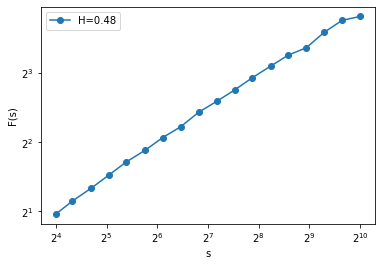

In [432]:
d.plot_Fs()